# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Zill Real Estate Data

## Find a data set to work and import it into your Jupyter book for time series analysis 

Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.


I initially sought a geographic dataset for Europe, but unfortunately, I couldn't find any freely available options on Quandl. Subsequently, I conducted a search using keywords like 'housing' and 'rental,' leading me to the 'Zillow Real Estate Data.' I discovered that this dataset includes information on both housing and rental properties, catering to both short-term and long-term rentals. This dataset could serve as a common key or point of connection with my primary dataset.

source: https://data.nasdaq.com/databases/ZILLOW 

### 1. Importing Visualization Libraries and Data

In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [4]:
import nasdaqdatalink

In [62]:
#loading garbage collector
import gc

In [5]:
# Incorporating API Key
quandl.ApiConfig.api_key = 'LqcU1exF3z-KCFHgyvkJ'

In [16]:
nasdaqdatalink.ApiConfig.api_key = 'LqcU1exF3z-KCFHgyvkJ'
data = nasdaqdatalink.get_table ('ZILLOW/DATA',indicator_id='ZSFH', region_id='99999')

In [17]:
data.head()

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,99999,2023-12-31,457244.888517
1,ZSFH,99999,2023-11-30,460399.252442
2,ZSFH,99999,2023-10-31,463455.930949
3,ZSFH,99999,2023-09-30,466458.929539
4,ZSFH,99999,2023-08-31,469024.636749


In [8]:
data.columns

Index(['indicator_id', 'region_id', 'date', 'value'], dtype='object')

In [9]:
data.shape

(228, 4)

In [19]:
#dropping merge column
data = data.drop(columns = ['indicator_id','region_id'])

In [20]:
data.head()

,date,value
None,,
0,2023-12-31,457244.888517
1,2023-11-30,460399.252442
2,2023-10-31,463455.930949
3,2023-09-30,466458.929539
4,2023-08-31,469024.636749


In [21]:
data = data.set_index('date') # Set the date as the index of the dataframe.

In [22]:
data.head()

,value
date,
2023-12-31,457244.888517
2023-11-30,460399.252442
2023-10-31,463455.930949
2023-09-30,466458.929539
2023-08-31,469024.636749


### Create a line chart of your data

In [23]:
type(data)

pandas.core.frame.DataFrame

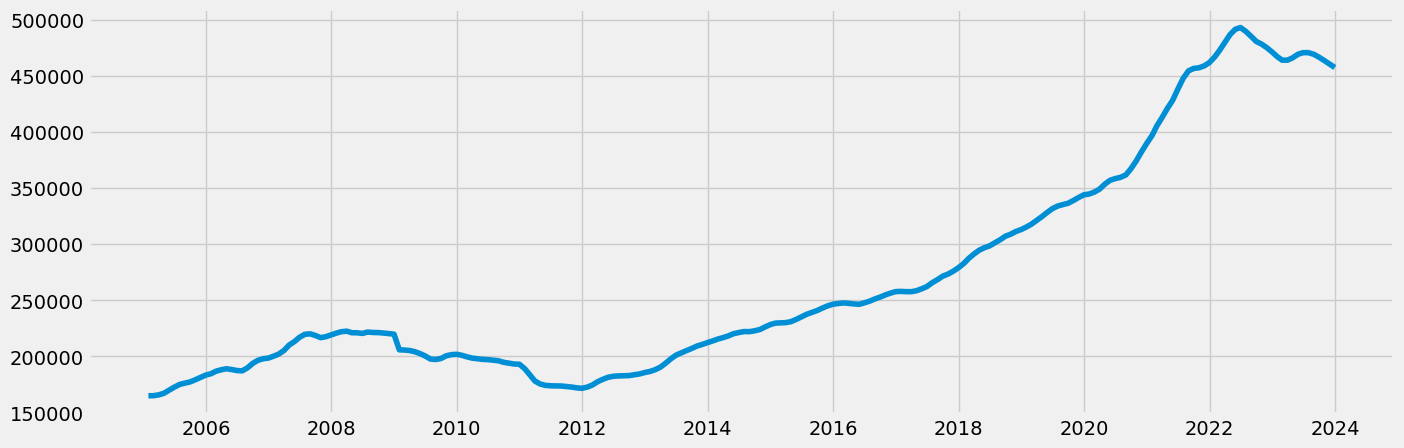

In [24]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

In [26]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [27]:
data_2.head()

,date,value
0,2023-12-31,457244.888517
1,2023-11-30,460399.252442
2,2023-10-31,463455.930949
3,2023-09-30,466458.929539
4,2023-08-31,469024.636749


In [29]:
data_sub = data_2.loc[(data_2['date'] >= '2018-01-01') & (data_2['date'] < '2024-01-01')]

In [30]:
data_sub.shape

(72, 2)

In [31]:
data_sub.head()

,date,value
0,2023-12-31,457244.888517
1,2023-11-30,460399.252442
2,2023-10-31,463455.930949
3,2023-09-30,466458.929539
4,2023-08-31,469024.636749


In [32]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,value
datetime,
2023-12-31,457244.888517
2023-11-30,460399.252442
2023-10-31,463455.930949
2023-09-30,466458.929539
2023-08-31,469024.636749


In [40]:
data_sub.sort_values(by='datetime', inplace=True)
data_sub.head()

,value
datetime,
2018-01-31,282785.909920
2018-02-28,287178.990919
2018-03-31,291191.590628
2018-04-30,294525.274077
2018-05-31,296832.769153


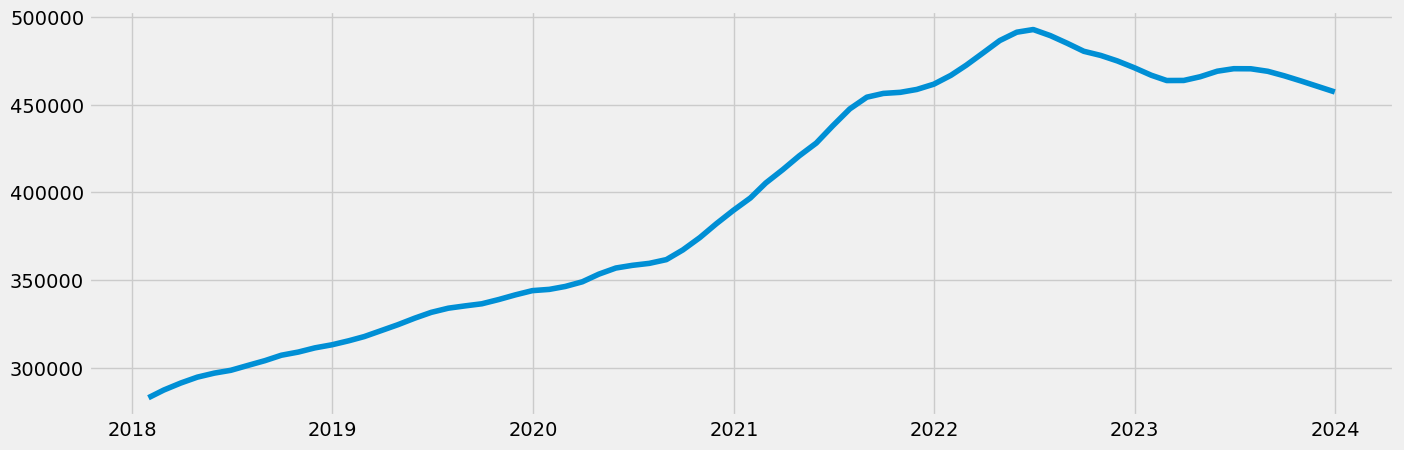

In [33]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [34]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

value    0
dtype: int64

In [35]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

### 3. Time-series analysis: decomposition

In [41]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [42]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

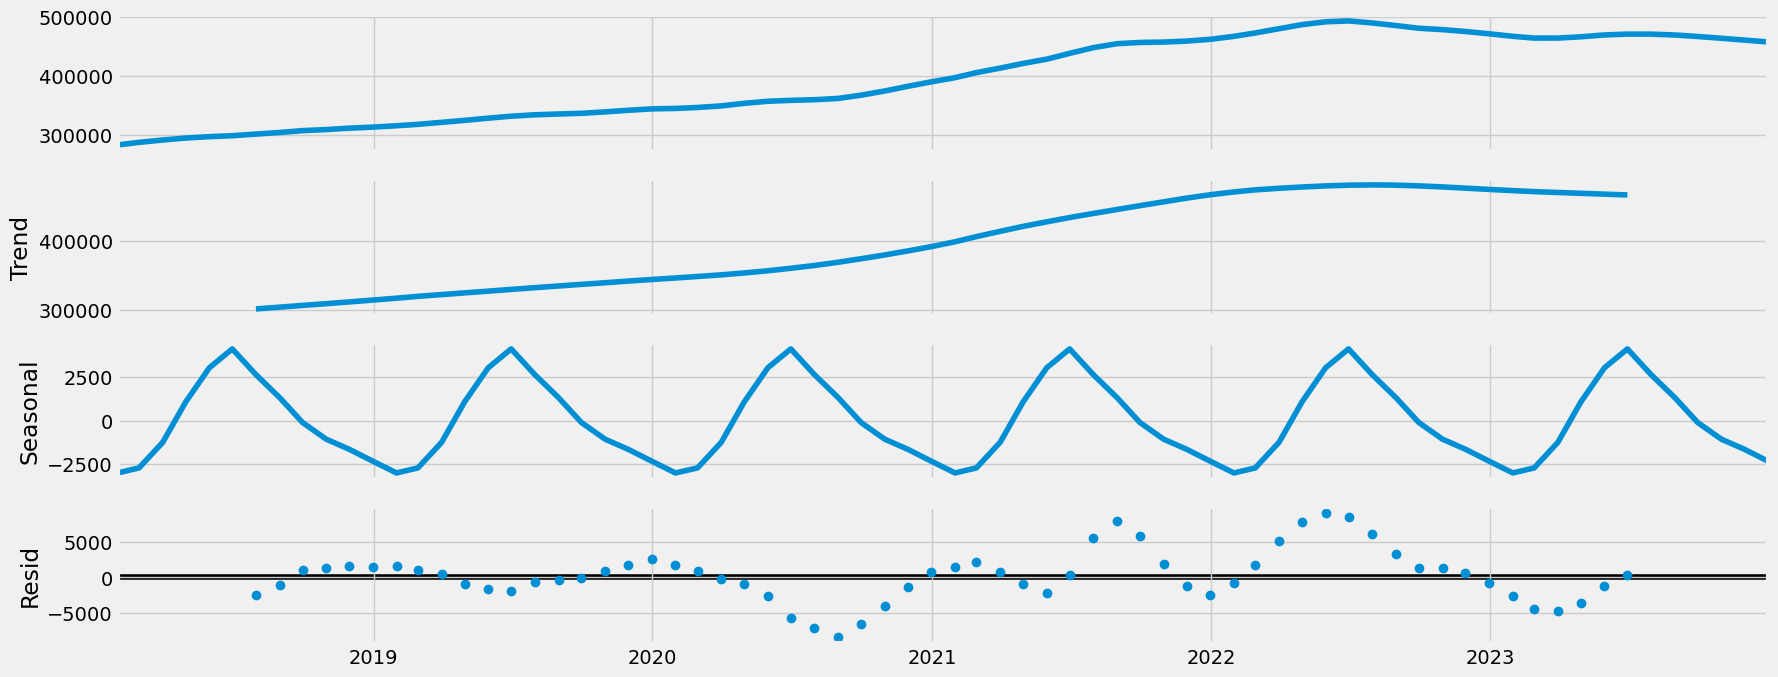

In [43]:
# Plot the separate components

decomposition.plot()
plt.show()

### Analyze the results from the plot in a markdown cell.

The baseline value steadily increases from 2018 until mid-2022 and then remains constant until January 2024.

Trend: The linear trend begins end of 2018 and steadily increases from 2018 until mid-2022 and then remains constant til mid 2023, meaning it shows a long term upward movement.


Seasonality: Seasonal fluctuations are shown within a time intervall of a year. It reaches it low at the beginning of each year in Janaury and goes upward till mid of the year (June/July) before it starts to decrease. 

Residual: The residual line indicates a variance of observations from mid 2020 til 2023. There are two picks, one in the 2nd half of 2021 and mid of 2022.


### 4. Testing for stationarity (Dickey Fuller test)

In [45]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

In [47]:
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [50]:

# Apply the test using the function on the time series
dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.639355
p-value                         0.462598
Number of Lags Used             8.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


#### Interpret the results in a markdown cell and reference your null hypothesis.

Since test statistic ( -1.639355) is larger than critical value of 5% ( -2.908645) and critical value of 10% ( -2.591897) , we can’t reject null hypothesis.

Test statistic larger than critical value = can't reject null hypothesis. 

This means dataset is non-stationary. Since we checked for non-stationarity, we need to check for autocorrelation.

p-value in this case is 0.45 which is larger then a "significant" p-value (p<0.05)


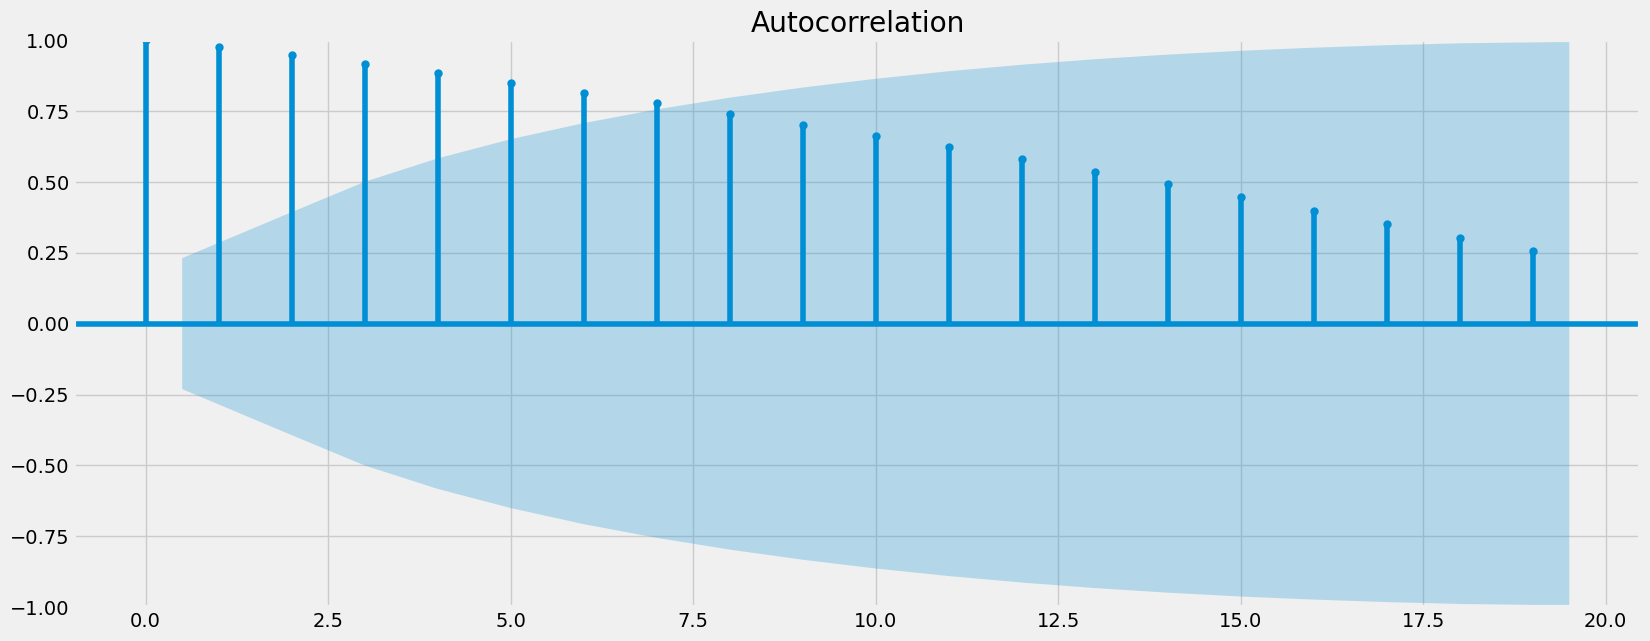

In [51]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

The time series has quite a few lags correlated with each other, meaning there is there is a lot of autocorrelated data and that the set is likley non-stationary. This supports the result of the previous Dickey Fuller test.

### 5. Stationarizing the Zill Real Estate Data

In [52]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = data_sub - data_sub.shift(1)

In [54]:
# Removing the missing values that came about as a result of the differencing. 

data_diff.dropna(inplace = True)

In [55]:
data_diff.head()

,value
datetime,
2018-02-28,4393.080998
2018-03-31,4012.599709
2018-04-30,3333.683450
2018-05-31,2307.495076
2018-06-30,1603.914347


In [56]:
data_diff.columns

Index(['value'], dtype='object')

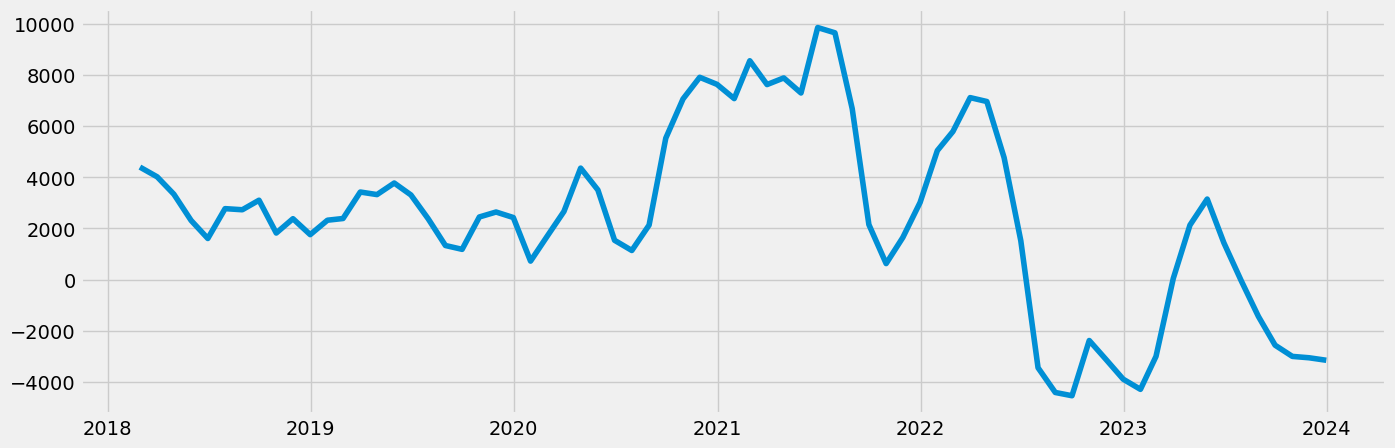

In [57]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [58]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.229755
p-value                         0.660667
Number of Lags Used             7.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


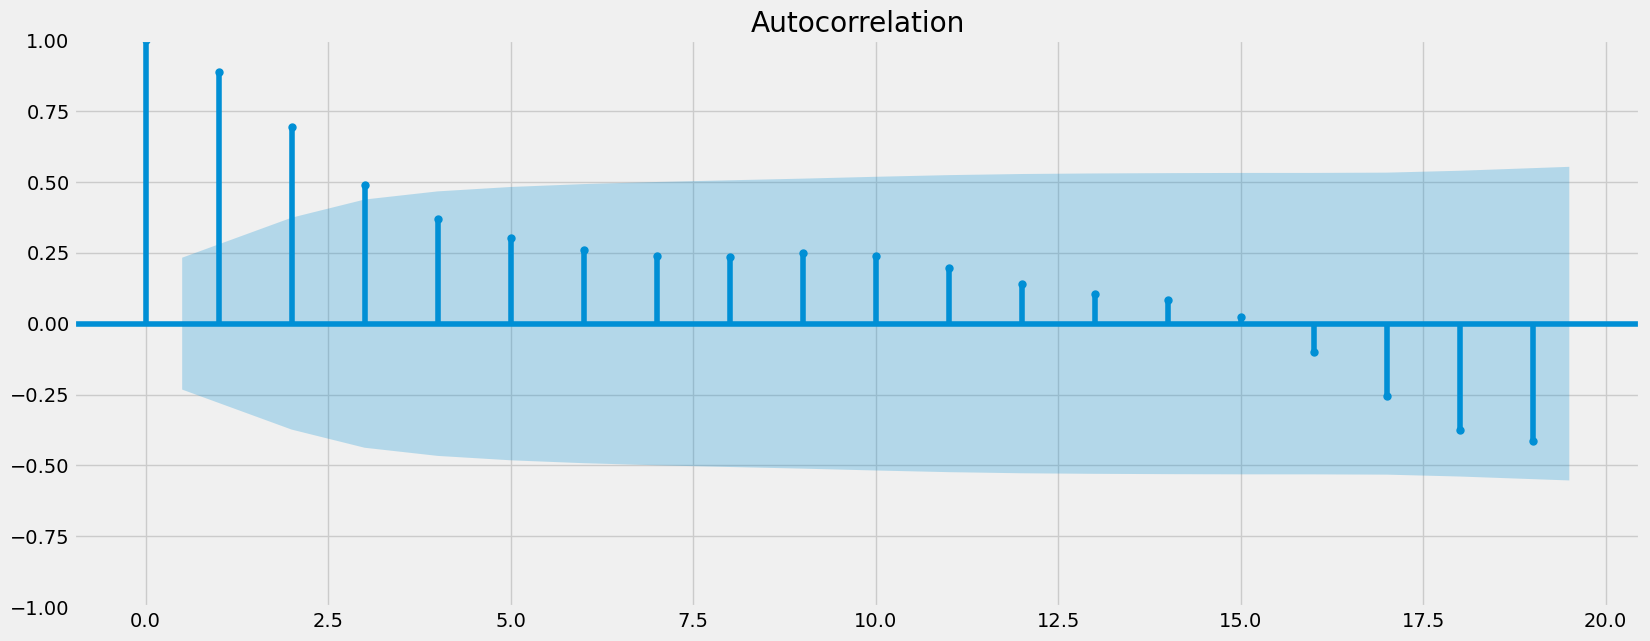

In [59]:
plot_acf(data_diff)
plt.show()

Test statistic is still larger than Critical values at all confidence intervals = can't reject null hypothesis; data is still non- stationary, but will try another round of differencing.

##### 2nd round stationarizing

In [60]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff_2 = data_diff - data_diff.shift(1)

In [61]:
# Removing the missing values that came about as a result of the differencing. 

data_diff_2.dropna(inplace = True)

In [72]:
data_diff_2.head()

,value
datetime,
2018-03-31,-380.481289
2018-04-30,-678.916259
2018-05-31,-1026.188374
2018-06-30,-703.580729
2018-07-31,1166.232666


In [66]:
data_diff_2.columns

Index(['value'], dtype='object')

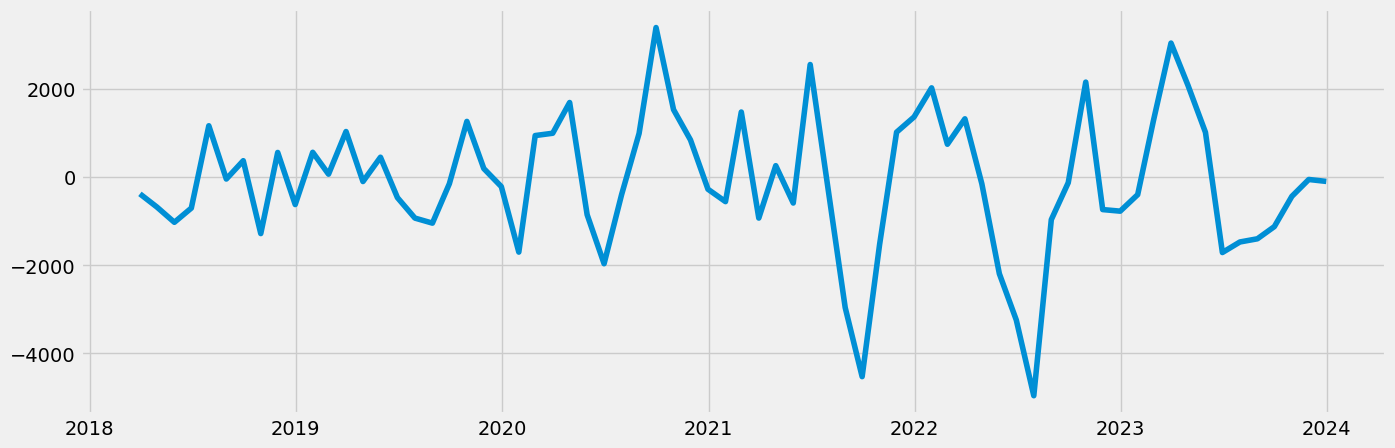

In [67]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [68]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.118008
p-value                         0.025249
Number of Lags Used             6.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


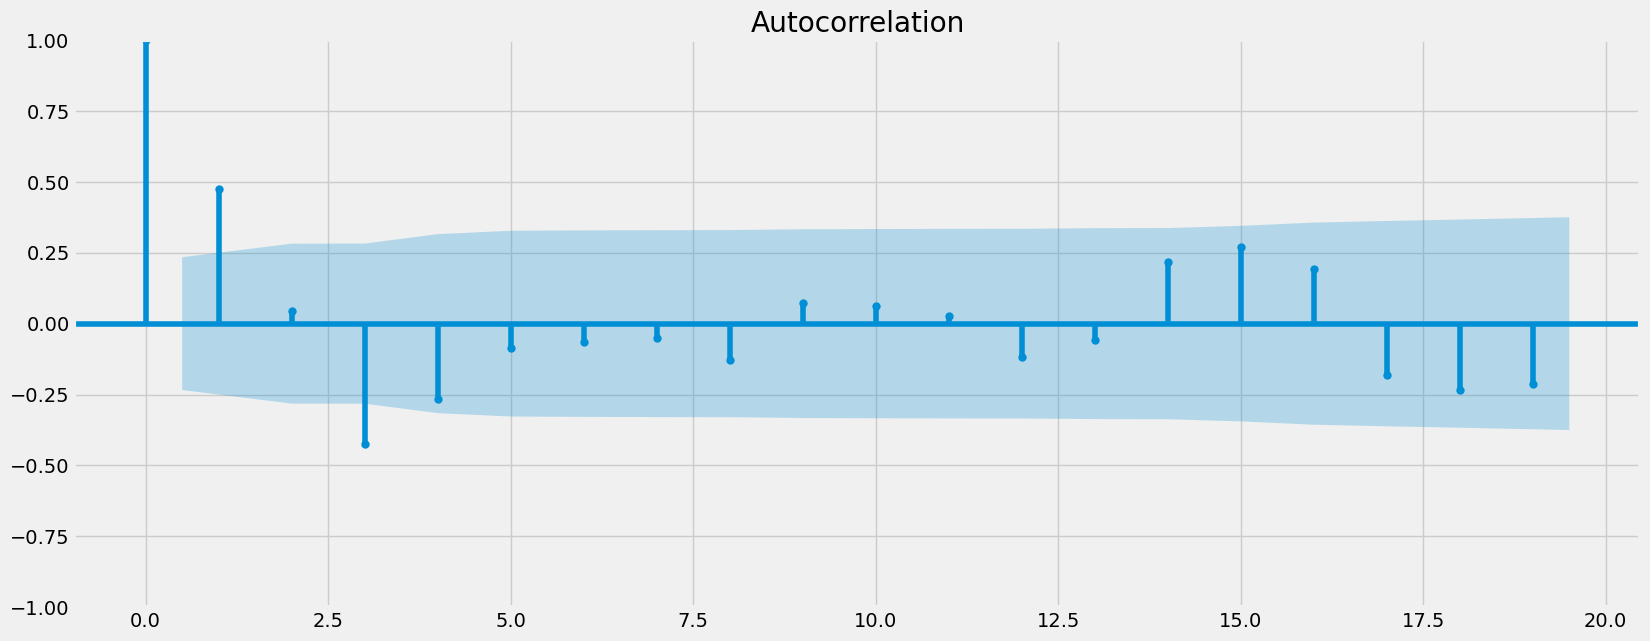

In [76]:
plot_acf(data_diff_2)
plt.show()

Test statistic is smaller than Critical values for 5% and 10% but not for 1%. Therefor will I try another round of differencing.

##### 3rd round stationarizing

In [69]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff_3 = data_diff_2 - data_diff_2.shift(1)

In [70]:
# Removing the missing values that came about as a result of the differencing. 

data_diff_3.dropna(inplace = True)

In [71]:
data_diff_3.head()

,value
datetime,
2018-04-30,-298.434970
2018-05-31,-347.272115
2018-06-30,322.607645
2018-07-31,1869.813395
2018-08-31,-1209.786777


In [73]:
data_diff_3.columns

Index(['value'], dtype='object')

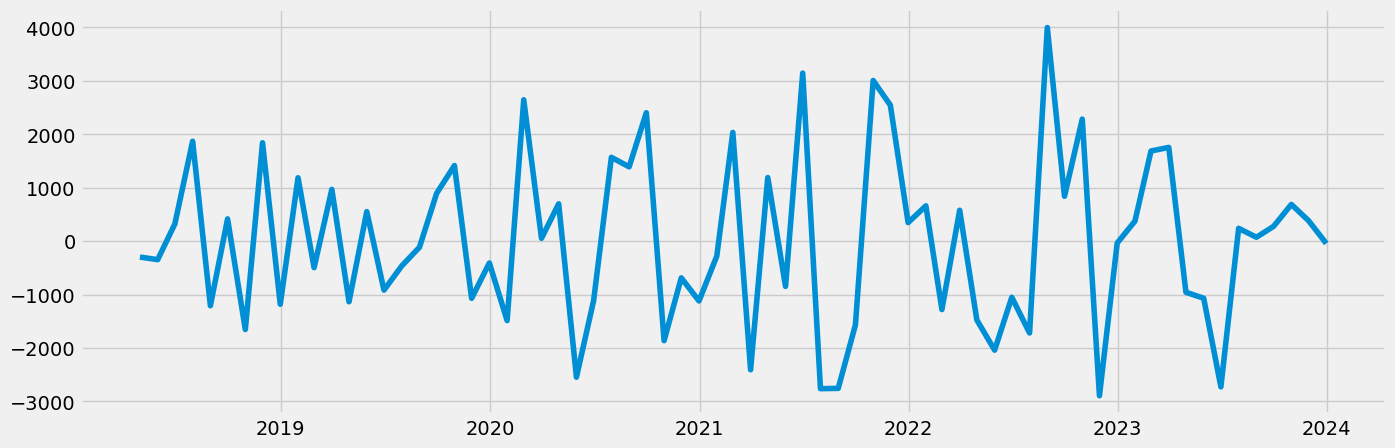

In [74]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_3)

In [75]:
dickey_fuller(data_diff_3)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.750530
p-value                         0.000068
Number of Lags Used            11.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


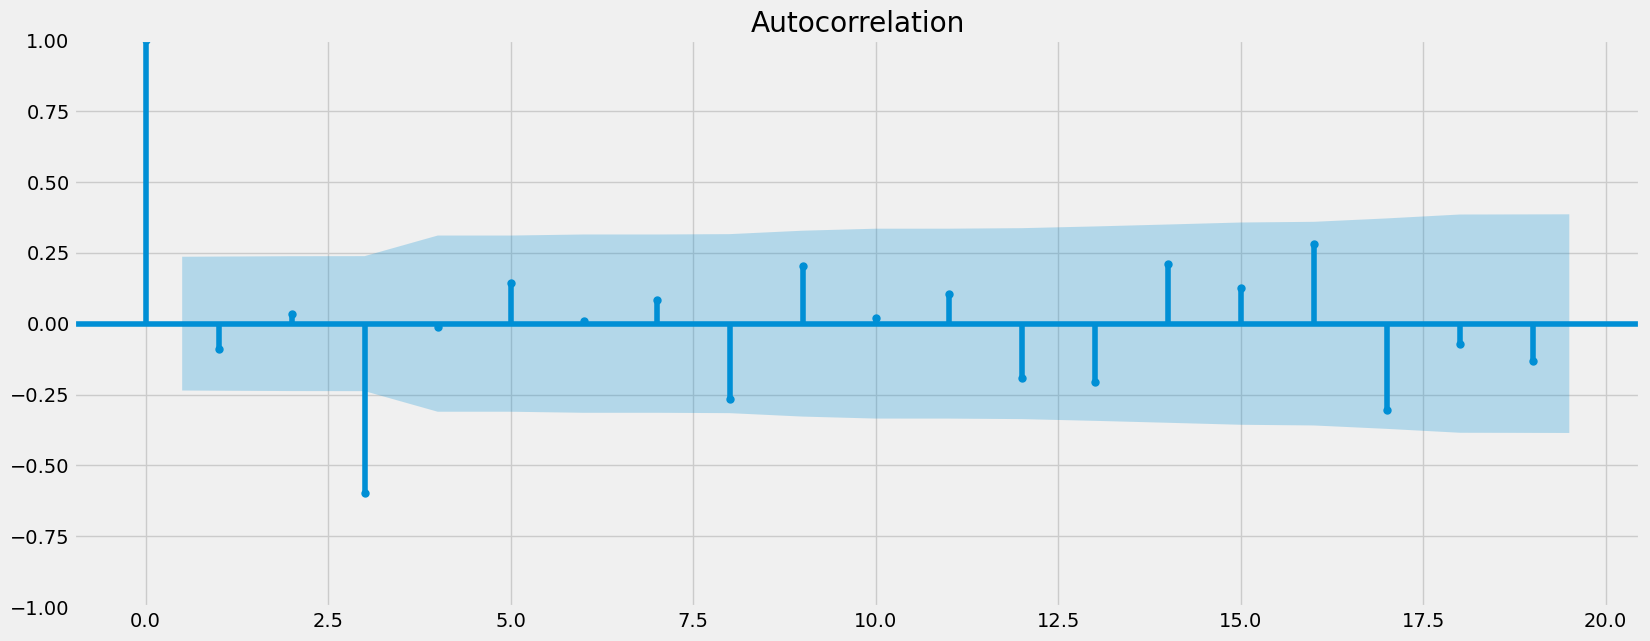

In [77]:
plot_acf(data_diff_3)
plt.show()

Test statistic is smaller than Critical values at all confidence intervals = can reject null hypothesis

data is stationary and now sufficent for time series analysis 

In [78]:
#delete df to save space 

del data_diff_3
del data_diff_2
del data_diff
del data_sub
del data_2
del data 

gc.collect()

34055